In [93]:
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt

In [94]:
crude_oil_data = pd.read_csv("./datasets/crude_oil_data_processed.csv")
crude_oil_data.head()


,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Pacific,Florida,Idaho,...,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Date,Year,Month
0,5138,21,655,17,583,82,1326,67,5,0,...,8,5,144,6,60,1097,1,2008-06-01,2008,6
1,5177,21,640,17,586,81,1372,61,6,0,...,8,5,145,5,61,1111,1,2008-07-01,2008,7
2,5003,21,544,17,588,82,1272,70,5,0,...,8,5,145,6,62,1110,1,2008-08-01,2008,8
3,3974,21,681,16,587,88,242,67,5,0,...,8,5,144,6,63,1055,1,2008-09-01,2008,9
4,4738,21,716,17,586,86,803,66,6,0,...,8,5,145,6,64,1125,1,2008-10-01,2008,10


In [95]:
for x in crude_oil_data.columns:
    x = x.strip()
    print(x)


U.S. Crude Oil
Alabama
Alaska
Arkansas
California
Colorado
Mexico
Pacific
Florida
Idaho
Illinois
Indiana
Kansas
Kentucky
Louisiana
Michigan
Mississippi
Missouri
Nebraska
Montana
Nevada
New Mexico
New York
North Dakota
Ohio
Oklahoma
Pennsylvania
South Dakota
Wyoming
West Virginia
Utah
Texas
Tennessee
Date
Year
Month


In [96]:
crude_oil_data["Date"] = pd.to_datetime(crude_oil_data["Date"])

crude_oil_data["Date"].head()


0   2008-06-01
1   2008-07-01
2   2008-08-01
3   2008-09-01
4   2008-10-01
Name: Date, dtype: datetime64[ns]

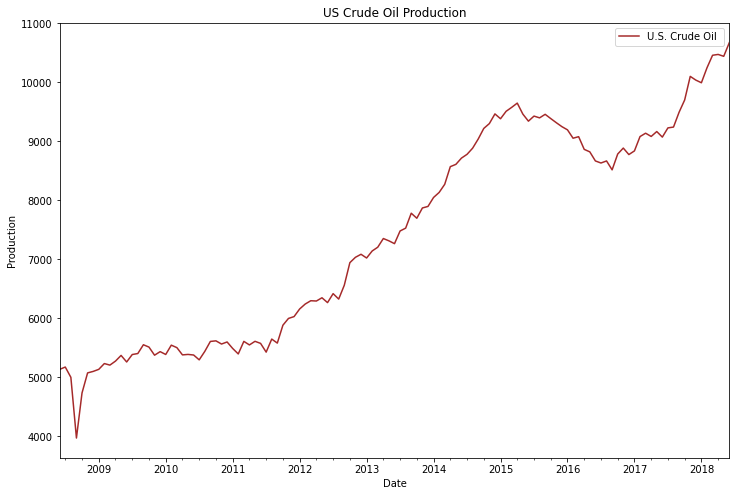

In [97]:
crude_oil_data.plot(x="Date", y="U.S. Crude Oil ", figsize=(12, 8), color="Brown")

plt.ylabel("Production")
plt.title("US Crude Oil Production");

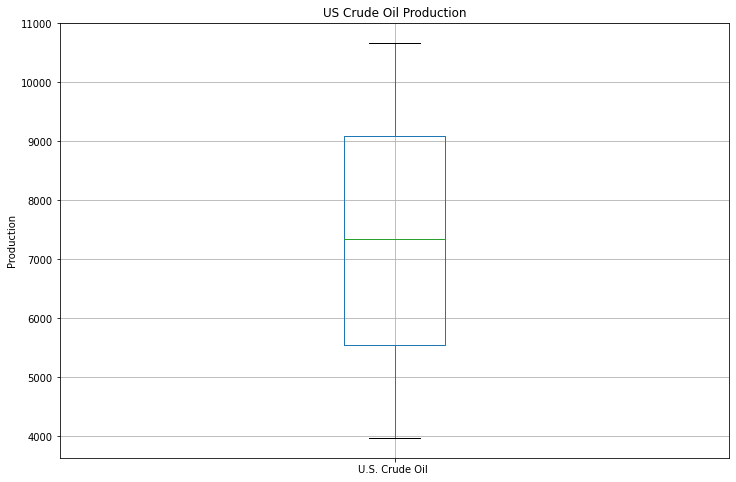

In [98]:
crude_oil_data.boxplot("U.S. Crude Oil ", figsize=(12, 8))

plt.ylabel("Production")
plt.title("US Crude Oil Production");

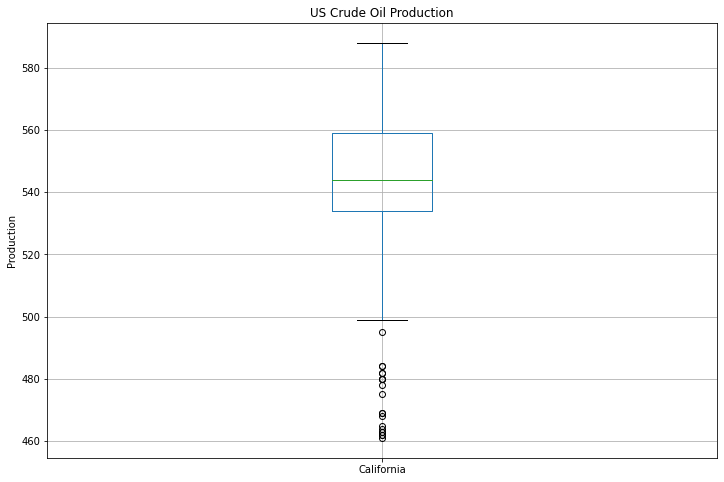

In [99]:
crude_oil_data[["California"]].boxplot(figsize=(12, 8))

plt.ylabel("Production")
plt.title("US Crude Oil Production");

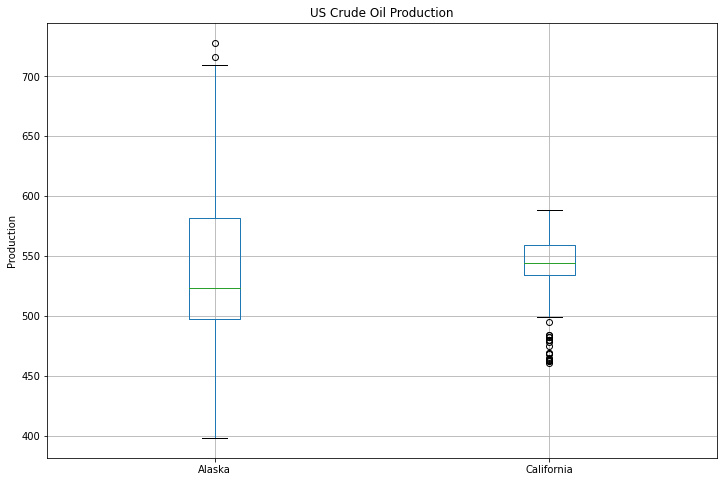

In [100]:
crude_oil_data[["Alaska", "California"]].boxplot(figsize=(12, 8))

plt.ylabel("Production")
plt.title("US Crude Oil Production");

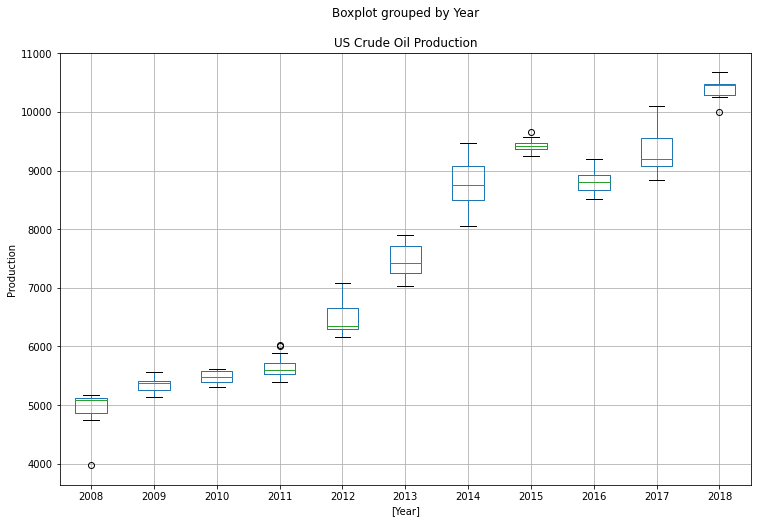

In [101]:
crude_oil_data.boxplot(column =["U.S. Crude Oil "], by=["Year"], figsize=(12, 8))

plt.ylabel("Production")
plt.title("US Crude Oil Production");

In [102]:
year_data = crude_oil_data.groupby('Year', as_index=False).sum()
year_data[["Year", 'U.S. Crude Oil ']]

,Year,U.S. Crude Oil
0,2008,34211
1,2009,64180
2,2010,65741
3,2011,67829
4,2012,78007
5,2013,89585
6,2014,105064
7,2015,113179
8,2016,105970
9,2017,112205


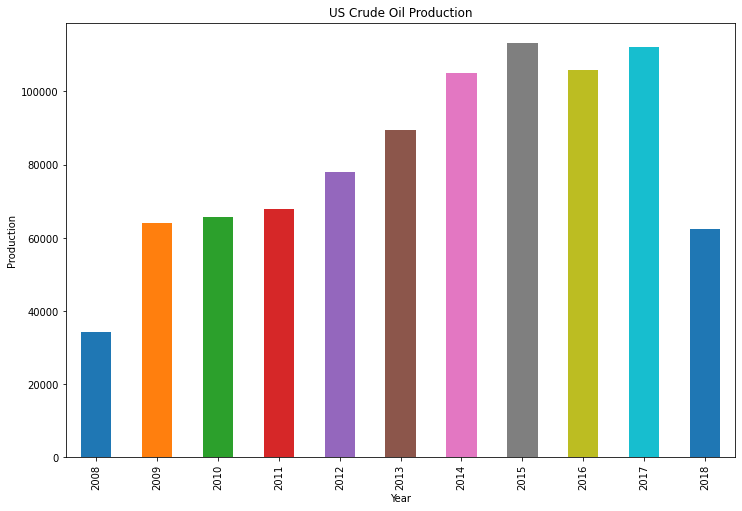

In [103]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

year_data.plot.bar(x="Year", y = "U.S. Crude Oil ", figsize=(12, 8), color = colors, legend=False)
plt.ylabel("Production")
plt.title("US Crude Oil Production");

In [104]:
mean_prod_data = crude_oil_data.mean()[1:-3]
mean_prod_data

C:\Users\natha\AppData\Local\Temp\ipykernel_13404\79581683.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_prod_data = crude_oil_data.mean()[1:-3]


Alabama            22.958678
Alaska            540.404959
Arkansas           16.462810
California        536.388430
Colorado          212.115702
Mexico           1444.264463
Pacific            43.115702
Florida             5.190083
Idaho               0.066116
Illinois           25.008264
Indiana             5.619835
Kansas            114.520661
Kentucky            7.041322
Louisiana         177.404959
Michigan           18.016529
Mississippi        62.355372
Missouri            0.223140
Nebraska            6.966942
Montana            71.537190
Nevada              1.000000
New Mexico        305.495868
New York            1.000000
North Dakota      746.380165
Ohio               33.322314
Oklahoma          321.611570
Pennsylvania       13.876033
South Dakota        4.504132
Wyoming           180.429752
West Virginia      16.471074
Utah               85.148760
Texas            2403.826446
dtype: float64

In [105]:
mean_prod_data = mean_prod_data.sort_values(ascending=False)
mean_prod_data

Texas            2403.826446
Mexico           1444.264463
North Dakota      746.380165
Alaska            540.404959
California        536.388430
Oklahoma          321.611570
New Mexico        305.495868
Colorado          212.115702
Wyoming           180.429752
Louisiana         177.404959
Kansas            114.520661
Utah               85.148760
Montana            71.537190
Mississippi        62.355372
Pacific            43.115702
Ohio               33.322314
Illinois           25.008264
Alabama            22.958678
Michigan           18.016529
West Virginia      16.471074
Arkansas           16.462810
Pennsylvania       13.876033
Kentucky            7.041322
Nebraska            6.966942
Indiana             5.619835
Florida             5.190083
South Dakota        4.504132
Nevada              1.000000
New York            1.000000
Missouri            0.223140
Idaho               0.066116
dtype: float64

In [106]:
mean_prod_df = pd.DataFrame(mean_prod_data).reset_index()

mean_prod_df.columns = ["State", "Production"]

mean_prod_df.head()

,State,Production
0,Texas,2403.826446
1,Mexico,1444.264463
2,North Dakota,746.380165
3,Alaska,540.404959
4,California,536.388430


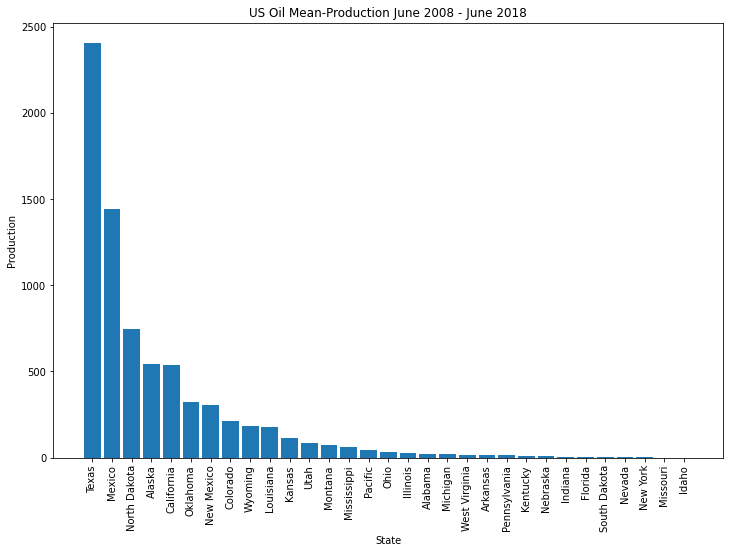

In [107]:
plt.figure(figsize=(12, 8))

plt.bar(mean_prod_df["State"], mean_prod_df["Production"], width=0.85)

plt.title("US Oil Mean-Production June 2008 - June 2018")

plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Production")

plt.show();


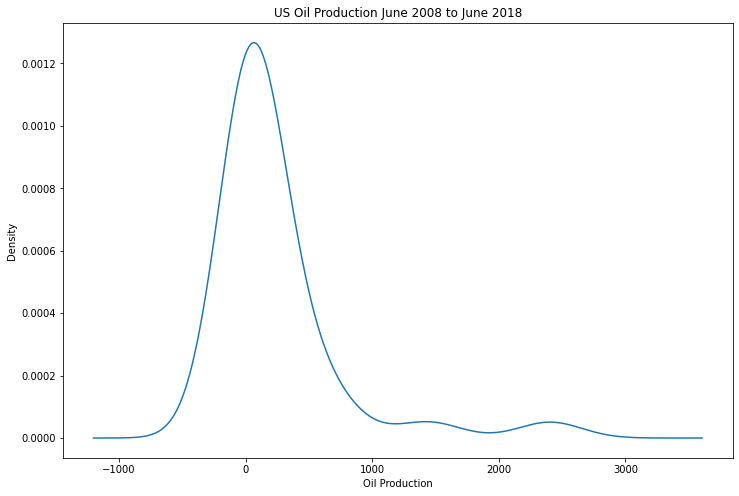

In [108]:
mean_prod_df["Production"].plot.kde(figsize=(12, 8))

plt.title("US Oil Production June 2008 to June 2018")
plt.xlabel("Oil Production")

plt.show();

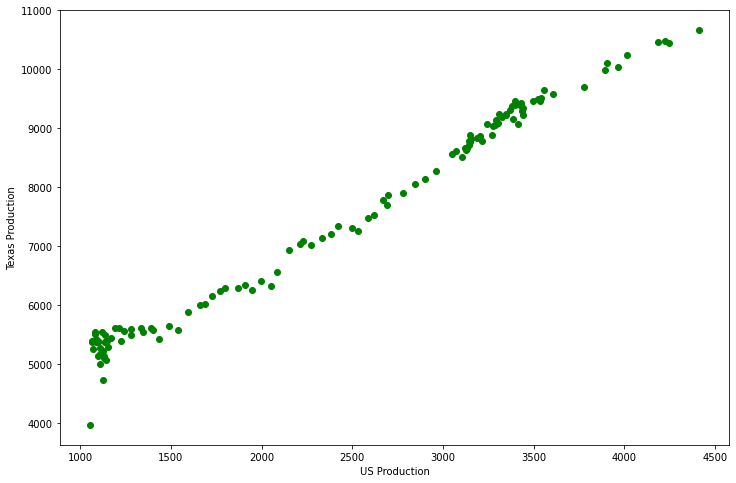

In [109]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data["Texas"], crude_oil_data["U.S. Crude Oil "], c= 'g')
plt.xlabel("US Production")
plt.ylabel("Texas Production")
plt.show();

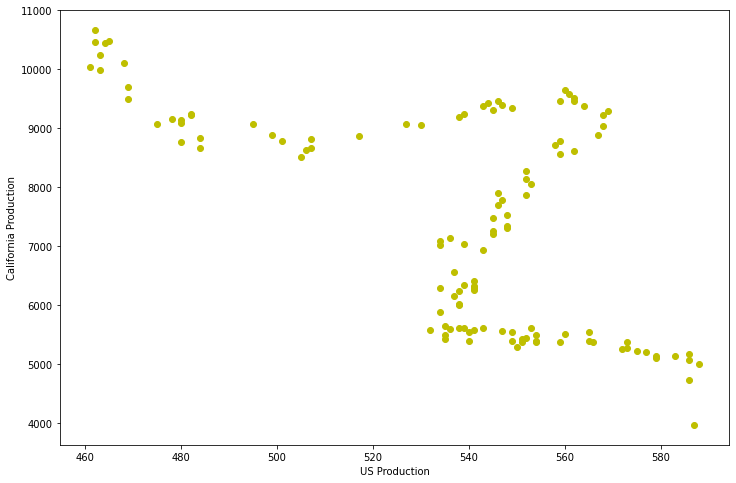

In [111]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data["California"], crude_oil_data["U.S. Crude Oil "], c= 'y')
plt.xlabel("US Production")
plt.ylabel("California Production")
plt.show();

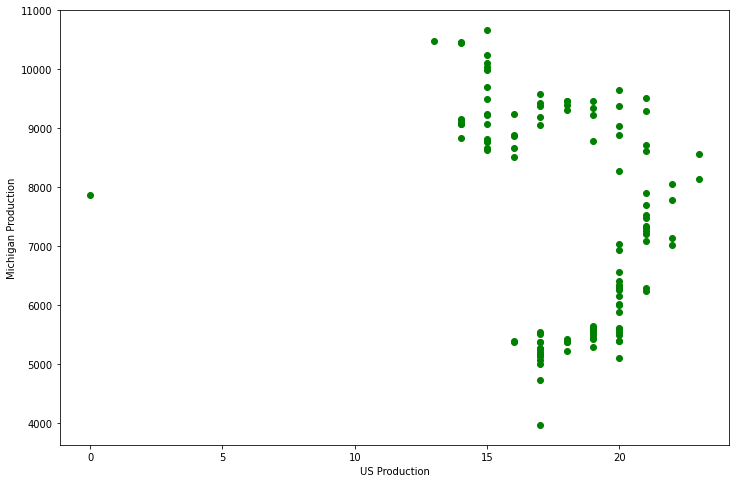

In [112]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data["Michigan"], crude_oil_data["U.S. Crude Oil "], c= 'g')
plt.xlabel("US Production")
plt.ylabel("Michigan Production")
plt.show();